In [1]:
import os
os.environ["SEED"] = "0"
import pandas as pd

from src.configuration_space.LKH import CONFIGURATION_SPACE
from src.constant import DATA_DIR
from src.database import DB
from src.instance.Instance import Instance
from src.instance.TSP_Instance import TSP_Instance
from src.solver.TSP_LKH_Solver import TSP_LKH_Solver

In [2]:
filepath = DATA_DIR / "TSP" / "CEPS_benchmark" / "cluster" / "00.tsp"
optimum = 19198495.0

In [3]:
instance = TSP_Instance(filepath, optimum)
instance

TSP_Instance(filepath=TSP/CEPS_benchmark/cluster/00.tsp)

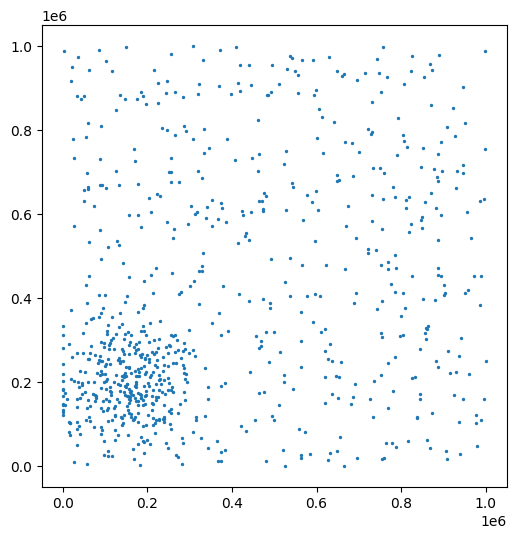

In [4]:
instance.plot()

In [5]:
new_instance, time = instance.mutate()

In [4]:
solver = TSP_LKH_Solver()
solver

Solver(id=52980316141715150)

In [6]:
solver.log()

[2024-12-22 23:43:14] DEBUG     Solver(id=52980316141715150)


In [7]:
instance.log()

[2024-12-22 23:43:25] DEBUG     TSP_Instance(filepath=TSP/CEPS_benchmark/cluster/00.tsp)


In [5]:
solver.solve(instance)

ResultWithTime(result=100.0, time=10.0)

In [7]:
db = DB()

In [8]:
instance.to_db()

In [6]:
solver.to_db()

In [9]:
pd.read_sql_query("SELECT * FROM instances", db._conn)

,id,filepath,optimum
0,1018017649469757748,TSP/CEPS_benchmark/cluster/00.tsp,19198495.0


In [15]:
TSP_Instance.from_db("1018017649469757748") == 1018017649469757748

True

In [10]:
instance.filepath

TSP_Instance(filepath=TSP/CEPS_benchmark/cluster/00.tsp)

In [5]:
import sys
import pickle

my_object = instance
in_memory_size = sys.getsizeof(my_object)
serialized_object = pickle.dumps(my_object)
serialized_size = len(serialized_object)

print(f"In-memory size: {in_memory_size} bytes")
print(f"Serialized size: {serialized_size} bytes")

In-memory size: 48 bytes
Serialized size: 3597 bytes
